In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from google.colab import drive
drive.mount('/content/gdrive')


warnings.filterwarnings("ignore")

np.random.seed(12345)

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Supervised_Learning/DataSet/Salary_DataSet/salary_dataset.csv")
data

,age,experience,gpa,degree,position,salary
0,30.0,7.0,3.94,bachelor,engineer,32500.0
1,26.0,2.0,2.86,bachelor,NaN,22500.0
2,27.0,0.0,3.13,doctorate,secretary,37000.0
3,32.0,NaN,3.10,bachelor,engineer,24500.0
4,24.0,1.0,3.81,bachelor,accountant,23500.0
...,...,...,...,...,...,...
85,31.0,1.0,2.79,master,engineer,34000.0
86,NaN,5.0,3.27,doctorate,secretary,36000.0
87,28.0,7.0,2.64,doctorate,secretary,38000.0
88,26.0,1.0,2.52,bachelor,secretary,NaN


In [ ]:
# 2 Clean data
# Handle missing values and outliers data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         89 non-null     float64
 1   experience  89 non-null     float64
 2   gpa         90 non-null     float64
 3   degree      90 non-null     object 
 4   position    89 non-null     object 
 5   salary      89 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.3+ KB


In [ ]:
data.dropna(axis=0, inplace=True)

In [ ]:
data.describe()

,age,experience,gpa,salary
count,86.000000,86.000000,86.000000,86.000000
mean,28.023256,3.848837,3.278605,31348.837209
std,4.408486,3.702201,0.528937,9255.227384
min,21.000000,0.000000,2.540000,13000.000000
25%,24.000000,1.000000,2.820000,24500.000000
50%,28.000000,3.000000,3.260000,30500.000000
75%,32.000000,7.000000,3.640000,37375.000000
max,35.000000,13.000000,5.880000,54000.000000


In [ ]:
data = data[data["gpa"] <= 4]

In [ ]:
data.describe()

,age,experience,gpa,salary
count,85.000000,85.000000,85.000000,85.000000
mean,27.952941,3.847059,3.248000,31370.588235
std,4.385870,3.724136,0.448993,9307.943657
min,21.000000,0.000000,2.540000,13000.000000
25%,24.000000,1.000000,2.820000,24500.000000
50%,28.000000,3.000000,3.250000,30500.000000
75%,32.000000,7.000000,3.610000,37500.000000
max,35.000000,13.000000,3.940000,54000.000000


In [ ]:
# 3 Split data for train and test set
target_name = "salary"
feature_name = list(data.columns.drop(target_name))

In [ ]:
x = data[feature_name]
y = data[target_name]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=True)

In [ ]:
# 4 Data preparation
numerical_feature = ["age", "experience", "gpa"]
categorical_feature = ["degree", "position"]

In [ ]:
for feature in categorical_feature:
    print(feature, " : ", np.unique(x_train[feature]))

degree  :  ['bachelor' 'doctorate' 'master']
position  :  ['accountant' 'engineer' 'secretary']


In [ ]:
ordinal_feature = ["degree"]
nominal_feature = ["position"]

In [ ]:
np.unique(data["degree"])

array(['bachelor', 'doctorate', 'master'], dtype=object)

In [ ]:
# ordinal_encoder = OrdinalEncoder(categories=[["bachelor", "doctorate", "master"]], dtype = int)
# x_train[ordinal_feature] = ordinal_encoder.fit(x_train[ordinal_feature])

In [ ]:
# 4.1 Ordinal Encoding
# Training Set
categories = [np.array(["bachelor", "doctorate", "master"], dtype=object), ]
data["degree"]
data_Degree = pd.DataFrame(data["degree"])

data_Degree
# oe = OrdinalEncoder(dtype=int)
# x_train = oe.fit(categories)

,degree
0,bachelor
2,doctorate
4,bachelor
5,doctorate
6,master
...,...
83,doctorate
84,bachelor
85,master
87,doctorate


In [ ]:
data_Degree.value_counts()
data_Degree

,degree
0,bachelor
2,doctorate
4,bachelor
5,doctorate
6,master
...,...
83,doctorate
84,bachelor
85,master
87,doctorate


In [ ]:
oe = OrdinalEncoder(dtype = object)
oe.fit(data_Degree)
# data_Degree_Ordinal_Encoder = oe.transform(data_Degree)

# oe.transform(x_train[ordinal_feature])

# encoding_View = data_Degree.assign(encode = data_Degree_Ordinal_Encoder)

# # encoding_View

# Train Set
ordinal_encoder_train = OrdinalEncoder(dtype = object)
ordinal_encoder_train.fit(x_train[ordinal_feature])
x_train[ordinal_feature] = ordinal_encoder_train.transform(x_train[ordinal_feature])

# Test Set
ordinal_encoder_test = OrdinalEncoder(dtype = object)
ordinal_encoder_test.fit(x_test[ordinal_feature])
x_test[ordinal_feature] = ordinal_encoder_test.transform(x_test[ordinal_feature])
# x_train[ordinal_feature]


# x_1_train = OrdinalEncoder(dtype  = object)
# x_1_train.fit(categories)
# x_1_train
# x_train[ordinal_feature] = ordinal_encoder.fit_transform(x_train[ordinal_feature])
x_test[ordinal_feature]

,degree
60,2
37,2
70,0
62,2
41,0
47,2
6,2
28,1
81,2
4,0


In [ ]:
# 4.2 One Hot Encoding
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
one_hot_encoder.fit(x_train[nominal_feature])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [ ]:
one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + "_" + str(cate)
        one_hot_feature.append(one_hot_feature_name)
nominal_feature

['position']

In [ ]:
# Train Set
x_train[one_hot_feature] = one_hot_encoder.transform(x_train[nominal_feature])
x_train.drop(nominal_feature, axis=1, inplace=True)

In [ ]:
# Test Set
x_test[one_hot_feature] = one_hot_encoder.transform(x_test[nominal_feature])
x_test.drop(nominal_feature, axis=1, inplace=True)

In [ ]:
# 5 Model Creation
reg = LinearRegression()

In [ ]:
# Train Model
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Model's Weight and Bias
reg.coef_

array([  609.96750875,   993.60415651,  3007.43531523,  2887.43946689,
        -263.88589724,  2711.57276674, -2447.6868695 ])

In [ ]:
reg.intercept_

-1851.6549705146754

In [ ]:
# 6 Prediction
y_pred_train = reg.predict(x_train)

In [ ]:
y_pred_test = reg.predict(x_test)

In [ ]:
# 7 Model Evaluate
# Train Set Scoring
print("r2_Score: \t\t\t", r2_score(y_train, y_pred_train))
print("Mean Squared Error: \t\t", mean_squared_error(y_train, y_pred_train))
print("Mean Absolute Error: \t\t", mean_absolute_error(y_train, y_pred_train))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train, y_pred_train))

r2_Score: 			 0.6296984915909847
Mean Squared Error: 		 31643240.900125314
Mean Absolute Error: 		 4684.913479233357
Mean Absolute Percentage Error:  0.15415789671394295


Text(0, 0.5, 'Actual')

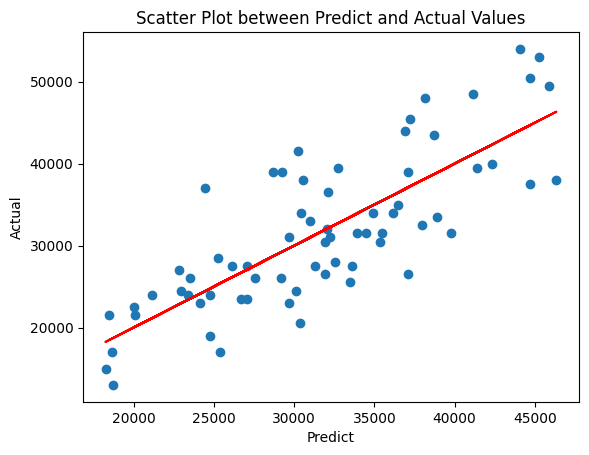

In [ ]:
plt.scatter(y_pred_train, y_train)
plt.plot(y_pred_train, y_pred_train, color = "red")
plt.title("Scatter Plot between Predict and Actual Values")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [ ]:
# Test Set Scoring
print("r2_Score: \t\t\t", r2_score(y_test, y_pred_test))
print("Mean Squared Error: \t\t", mean_squared_error(y_test, y_pred_test))
print("Mean Absolute Error: \t\t", mean_absolute_error(y_test, y_pred_test))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred_test))

r2_Score: 			 0.6599837943122784
Mean Squared Error: 		 28970204.29325818
Mean Absolute Error: 		 4358.483311876657
Mean Absolute Percentage Error:  0.1437860477147516


Text(0, 0.5, 'Actual')

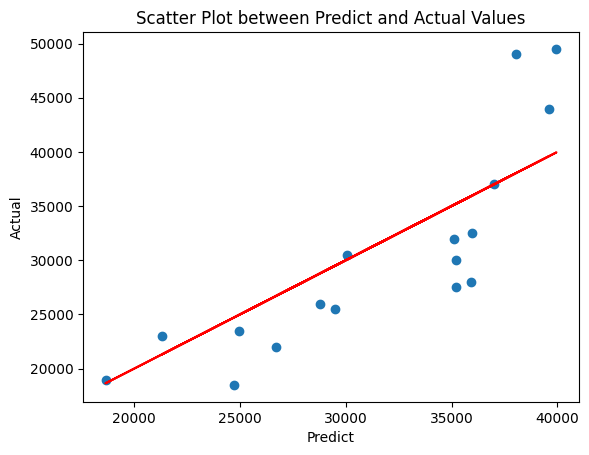

In [ ]:
plt.scatter(y_pred_test, y_test)
plt.plot(y_pred_test, y_pred_test, color = "red")
plt.title("Scatter Plot between Predict and Actual Values")
plt.xlabel("Predict")
plt.ylabel("Actual")